# Predicting the Critical Temperature of a Superconductor


#### Name: Roshan Wahane
#### Date: 10/10/2019

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- Hmisc
- DmWR
- Metrics
- Caret
- XGBoost

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## Loading required libraries 

In [2]:
#install.packages("ggcorrplot")
#install.packages("car")
#install.packages('DMwR')
#install.packages("Metrics")
#install.packages("xgboost")

In [3]:
library(ISLR)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(Hmisc)
library(lattice)
library(survival)
library(Formula)
library(ggcorrplot)
library(caret)
library(car)
library(dplyr)
library(tidyr)
library(tibble)
library(dplyr)
library(corrplot)
library(pROC)
library(DMwR)
library(Metrics)
library(xgboost)

Warning message:
"package 'ISLR' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'GGally' was built under R version 3.5.3"Warning message:
"package 'gridExtra' was built under R version 3.5.3"Warning message:
"package 'cowplot' was built under R version 3.5.3"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Warning message:
"package 'Hmisc' was built under R version 3.5.3"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster

Loading required package: carData
Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package:

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this project, with the use of provided dataset we are required to build regression models to predict the critical temperature of superconductors. To accomplish this task, we are to first analyse the superconductor dataset to gain some insight about the properties andn features associated with critical temperature.<br>
The data set contains 21,263 records and 82 columns where 80 columns are features extracted from 8 properties.The purpose of the assessment is to identitfy the key properties and its contribution for a superconductor.

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

Changing the maximum number of rows and columns to be displayed in the notebook.

In [4]:
options(scipen = 999) # disabling scientific notation

In [5]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=100) # making the dataframe show all cols

Reading the full data set

In [6]:
train = read.csv("train.csv") # reading the dataset file

In [7]:
head(train) # printing first few lines of the dataframe

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,53.62253,775.425,1010.269,718.1529,938.0168,1.305967,0.7914878,810.6,735.9857,323.8118,355.5630,160.25,105.5143,136.1260,84.52842,1.259244,1.207040,205,42.91429,75.23754,69.23557,4654.357,2961.502,724.9532,53.54381,1.033129,0.8145982,8958.571,1579.583,3306.163,3572.597,81.8375,111.7271,60.12318,99.41468,1.159687,0.7873817,127.05,80.98714,51.43371,42.55840,6.9055,3.846857,3.479475,1.040986,1.088575,0.9949982,12.878,1.744571,4.599064,4.666920,107.7566,61.01519,7.062488,0.6219795,0.3081480,0.2628483,399.9734,57.12767,168.8542,138.5172,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,53.97987,766.440,1010.613,720.6055,938.7454,1.544145,0.8070782,810.6,743.1643,290.1830,354.9635,161.20,104.9714,141.4652,84.37017,1.508328,1.204115,205,50.57143,67.32132,68.00882,5821.486,3021.017,1237.0951,54.09572,1.314442,0.9148022,10488.571,1667.383,3767.403,3632.649,90.8900,112.3164,69.83331,101.16640,1.427997,0.8386665,127.05,81.20786,49.43817,41.66762,7.7844,3.796857,4.403790,1.035251,1.374977,1.0730938,12.878,1.595714,4.473363,4.603000,172.2053,61.37233,16.064228,0.6197346,0.8474042,0.5677061,429.9734,51.41338,198.5546,139.6309,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,53.65627,775.425,1010.820,718.1529,939.0090,1.305967,0.7736202,810.6,743.1643,323.8118,354.8042,160.25,104.6857,136.1260,84.21457,1.259244,1.132547,205,49.31429,75.23754,67.79771,4654.357,2999.159,724.9532,53.97402,1.033129,0.7603052,8958.571,1667.383,3306.163,3592.019,81.8375,112.2136,60.12318,101.08215,1.159687,0.7860067,127.05,81.20786,51.43371,41.63988,6.9055,3.822571,3.479475,1.037439,1.088575,0.9274794,12.878,1.757143,4.599064,4.649635,107.7566,60.94376,7.062488,0.6190947,0.3081480,0.2504774,399.9734,57.12767,168.8542,138.5406,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,53.63940,775.425,1010.544,718.1529,938.5128,1.305967,0.7832067,810.6,739.5750,323.8118,355.1839,160.25,105.1000,136.1260,84.37135,1.259244,1.173033,205,46.11429,75.23754,68.52166,4654.357,2980.331

In [8]:
dim(train) # printing the dimensions of the dataframe

[1] 21263    82

In [9]:
str(train) # checking the structure of the dataframe

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

In [10]:
#colSums(sapply(train, is.na)) # to check if any columns have na values

In [11]:
summary(train) # printing statistical summary of the dataframe

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

Generating the correlation statistics between all features of the data set.

In [12]:
cor(train) # generating correlation between all features of the dataframe

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000000,-0.141922797,-0.353064435,-0.292968819,-0.454525138,0.93930406,0.881845150,0.682777066,-0.320293446,0.5139981526,0.546391203,0.167450898,0.484444731,0.024228530,0.4241522235,0.97319533,0.719209167,0.781226913,0.329623733,0.67400475148,0.717830737,-0.0013888223,-0.42214416,-0.240444347,-0.518255859,0.97224524,0.904120682,0.768060022,-0.371349583,0.6248102983,0.69508858,-0.41867470,-0.507895375,-0.6305040923,-0.64988231,0.871831749,0.767078421,0.413485633,-0.355389487,0.21072387,0.334072073,-0.1193025717,0.195607767,-0.3560672476,-0.052883973,0.87730402,0.62579840,0.53154041,0.241411233,0.42373826,0.4808125440,-0.437624455,-0.449271665,-0.514251754,-0.519109340,0.900759345,0.86047882,0.005734172,-0.371787677,-0.1133612277,-0.074796377,0.227655893,0.206068511,-0.485323530,-0.469206128,0.501871343,0.207065208,0.69605999,0.316771509,0.60201807,0.66557986,-0.60941236,-0.648550851,-0.61851245,-0.65926774,0.967832451,0.892559475,0.231873976,-0.44776982,0.1053651524,0.03521628831,0.60106857
mean_atomic_mass,-0.141922797,1.000000000,0.815977034,0.940298163,0.745840579,-0.10400015,-0.097609229,0.125658599,0.446224904,0.1964604909,0.130675110,-0.285781955,-0.222097406,-0.240565224,-0.2193812727,-0.16693490,-0.163564893,-0.255627735,-0.080544826,-0.27656057377,-0.222811916,0.4976636306,0.37675980,0.561060699,0.359894450,-0.14003444,-0.147603805,-0.270694807,0.141100325,-0.3264029059,-0.28043975,0.75686112,0.608934913,0.5964846429,0.52558812,-0.043415596,0.026324752,0.198067091,0.342390738,0.24504240,0.180942527,0.0882295363,0.061103034,0.1892824348,0.134382340,-0.09153941,-0.10765065,-0.18706859,0.010235114,-0.16496019,-0.1331005498,-0.137668902,-0.135428565,0.014818495,-0.043002734,-0.008498640,-0.02854094,-0.347581882,-0.167527922,-0.3379688013,-0.335778336,-0.158265641,-0.065988791,0.006004074,0.056394180,-0.100076682,-0.098220524,-0.11453787,-0.027789696,-0.11065781,-0.11085641,0.37409881,0.304683244,0.39215274,0.32139894,-0.156786430,-0.145610386,-0.107449727,0.16863251,-0.0802785631,-0.08125267747,-0.11352325
wtd_mean_atomic_mass,-0.353064435,0.815977034,1.000000000,0.848241529,0.964085105,-0.30804601,-0.412665507,-0.144029437,0.716623230,-0.0607391526,-0.089470766,-0.209296217,-0.522595267,-0.109490435,-0.5081088151,-0.36977251,-0.129779058,-0.452303149,-0.420457052,-0.45932346171,-0.492250297,0.2884514847,0.66001105,0.468457460,0.6671

In [13]:
corr = cor(train) # saving the correlation in a variable for further analysis

In [14]:
# taking a look at the features where correlation is more than 0.7
findCorrelation(corr, cutoff = .7, exact = FALSE, names=T)
# below features have medium to high correlation

[1] "wtd_mean_atomic_mass"            "gmean_atomic_mass"              
 [3] "wtd_gmean_atomic_mass"           "wtd_entropy_atomic_mass"        
 [5] "wtd_std_atomic_mass"             "entropy_fie"                    
 [7] "range_fie"                       "std_fie"                        
 [9] "wtd_std_fie"                     "mean_atomic_radius"             
[11] "wtd_mean_atomic_radius"          "gmean_atomic_radius"            
[13] "wtd_gmean_atomic_radius"         "entropy_atomic_radius"          
[15] "wtd_entropy_atomic_radius"       "range_atomic_radius"            
[17] "std_atomic_radius"               "wtd_std_atomic_radius"          
[19] "mean_Density"                    "wtd_mean_Density"               
[21] "gmean_Density"                   "wtd_gmean_Density"              
[23] "wtd_range_Density"               "wtd_std_Density"                
[25] "wtd_mean_ElectronAffinity"       "gmean_ElectronAffinity"         
[27] "entropy_ElectronAffinity"        "wtd_range_ElectronAffinity"     
[29] "wtd_std_ElectronAffinity"        "wtd_mean_FusionHeat"            
[31] "gmean_FusionHeat"                "wtd_gmean_FusionHeat"           
[33] "entropy_FusionHeat"              "wtd_entropy_FusionHeat"         
[35] "std_FusionHeat"                  "wtd_std_FusionHeat"             
[37] "wtd_entropy_ThermalConductivity" "wtd_range_ThermalConductivity"  
[39] "wtd_std_ThermalConductivity"     "mean_Valence"                   
[41] "wtd_mean_Valence"                "gmean_Valence"                  
[43] "wtd_gmean_Valence"               "entropy_Valence"                
[45] "wtd_entropy_Valence"             "wtd_range_Valence"              
[47] "wtd_std_Valence"                 "number_of_elements"             
[49] "range_atomic_mass"               "mean_fie"                       
[51] "wtd_mean_fie"                    "wtd_gmean_fie"                  
[53] "entropy_atomic_mass"             "wtd_entropy_fie"                
[55] "entropy_Density"                 "std_atomic_mass"                
[57] "range_Density"                   "range_ElectronAffinity"         
[59] "mean_FusionHeat"                 "wtd_range_FusionHeat"           
[61] "gmean_ThermalConductivity"       "range_ThermalConductivity"      
[63] "range_Valence"

In [15]:
summary(corr) # we can see the min and max values for each feature

 number_of_elements mean_atomic_mass   wtd_mean_atomic_mass gmean_atomic_mass  
 Min.   :-0.6593    Min.   :-0.34758   Min.   :-0.55482     Min.   :-0.512841  
 1st Qu.:-0.3559    1st Qu.:-0.14711   1st Qu.:-0.30359     1st Qu.:-0.274018  
 Median : 0.2192    Median :-0.07313   Median :-0.09163     Median :-0.123167  
 Mean   : 0.1853    Mean   : 0.05556   Mean   : 0.01453     Mean   : 0.002268  
 3rd Qu.: 0.6719    3rd Qu.: 0.19467   3rd Qu.: 0.26675     3rd Qu.: 0.197649  
 Max.   : 1.0000    Max.   : 1.00000   Max.   : 1.00000     Max.   : 1.000000  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :-0.68113      Min.   :-0.5928     Min.   :-0.6557        
 1st Qu.:-0.37039      1st Qu.:-0.3121     1st Qu.:-0.4087        
 Median :-0.16902      Median : 0.2079     Median : 0.2112        
 Mean   :-0.02578      Mean   : 0.1797     Mean   : 0.1696        
 3rd Qu.: 0.29468      3rd Qu.: 0.6132     3rd Qu.: 0.6611        
 Max.   : 1.00000      Max.   : 1.0000

o Values between 0 and 0.3 (0 and -0.3) indicate a weak positive (negative) linear relationship via a shaky linear rule.<br>
o Values between 0.3 and 0.7 (-0.3 and -0.7) indicate a moderate positive (negative) linear relationship via a fuzzy-firm linear rule.<br>
o Values between 0.7 and 1.0 (-0.7 and -1.0) indicate a strong positive (negative) linear relationship via a firm linear rule.<br>

In [17]:
corr[lower.tri(corr,diag=TRUE)]=NA  #Prepare to drop duplicates and meaningless information
corr=as.data.frame(as.table(corr))  #Turn into a 3-column table
corr=na.omit(corr)  #Get rid of the junk we flagged above
corr=corr[order(-abs(corr$Freq)),]    #Sort by highest correlation (whether +ve or -ve)

Above printed correlation matrix was difficult to analyse due to the big number of features. <br>
We will try to visualise moderate and high level correlation between the feature to gain further knowledge about the relationship between the variables. 

In [18]:
corr = corr %>% 
    filter( Freq > 0.7 | Freq < (-0.7) ) # from the above matrix we are filtering medium to high correlation

In [127]:
head(corr)

Var1,Var2,Freq
entropy_fie,entropy_atomic_radius,0.9977394
wtd_mean_Valence,wtd_gmean_Valence,0.9949388
entropy_fie,entropy_Valence,0.9927256
wtd_mean_fie,wtd_gmean_fie,0.9923311
mean_Valence,gmean_Valence,0.9899105
entropy_atomic_radius,entropy_Valence,0.9895461


In [20]:
length(corr$Freq)

[1] 299

In [21]:
# DISABLING THIS COMMAND AS THE PRINTED REPORT IS EXTRA LONG DUE TO THIS

#rcorr(as.matrix(train[,])) # rcorr function to also get the p-values of the features 

In [22]:
# creating a function to get correlation as well as p-values for the features

flat_cor_mat <- function(cor_r, cor_p){
  #This function provides a simple formatting of a correlation matrix
  #into a table with 4 columns containing :
    # Column 1 : row names (variable 1 for the correlation test)
    # Column 2 : column names (variable 2 for the correlation test)
    # Column 3 : the correlation coefficients
    # Column 4 : the p-values of the correlations
  cor_r <- rownames_to_column(as.data.frame(cor_r), var = "row")
  cor_r <- gather(cor_r, column, cor, -1)
  cor_p <- rownames_to_column(as.data.frame(cor_p), var = "row")
  cor_p <- gather(cor_p, column, p, -1)
  cor_p_matrix <- left_join(cor_r, cor_p, by = c("row", "column"))
  cor_p_matrix
}


In [23]:
cor_3 <- rcorr(as.matrix(train[,]))

In [24]:
my_cor_matrix <- flat_cor_mat(cor_3$r, cor_3$P)

In [128]:
head(my_cor_matrix)
tail(my_cor_matrix)

row,column,cor,p
number_of_elements,number_of_elements,1.0000000,NA
mean_atomic_mass,number_of_elements,-0.1419228,0
wtd_mean_atomic_mass,number_of_elements,-0.3530644,0
gmean_atomic_mass,number_of_elements,-0.2929688,0
wtd_gmean_atomic_mass,number_of_elements,-0.4545251,0
entropy_atomic_mass,number_of_elements,0.9393041,0


,row,column,cor,p
6719,wtd_entropy_Valence,critical_temp,0.5896637,0
6720,range_Valence,critical_temp,-0.1435464,0
6721,wtd_range_Valence,critical_temp,-0.4399008,0
6722,std_Valence,critical_temp,-0.2080716,0
6723,wtd_std_Valence,critical_temp,-0.3000280,0
6724,critical_temp,critical_temp,1.0000000,NA


#### EDA critical temperature

We will further do data exploration on the critical temperature column to see its relationship with other features.

In [27]:
tc_corr <- round(cor(train, train$critical_temp), 5) # checking the correlation with the target variable

In [28]:
#correlation_table(train, train$critical_temp)

In [29]:
tc_corr_pos <- tc_corr[tc_corr[,]>0.3,] # positive correlations to the target variable 

In [30]:
tc_corr_neg <- tc_corr[tc_corr[,]<(-0.3),] # negative correlations to the target variable 

In [31]:
tc_corr_all <- append(tc_corr_pos, tc_corr_neg) # significant correlation in one variable of the target variable

Generating the correlation of features with critical temp. We can make inference that the top correlated features would significantly contribute and has higher importance. I can confidentaly conclude that top few features will be included in the regression model.

In [32]:
sort(tc_corr_all)

wtd_mean_Valence             wtd_gmean_Valence 
                     -0.63240                      -0.61565 
                 mean_Valence                 gmean_Valence 
                     -0.60008                      -0.57307 
                gmean_Density             wtd_gmean_Density 
                     -0.54168                      -0.54005 
            wtd_range_Valence              wtd_mean_Density 
                     -0.43990                      -0.43394 
         wtd_gmean_FusionHeat              gmean_FusionHeat 
                     -0.43236                      -0.43179 
      wtd_gmean_atomic_radius           wtd_mean_FusionHeat 
                     -0.40518                      -0.39412 
    gmean_ThermalConductivity               mean_FusionHeat 
                     -0.38719                      -0.38551 
       gmean_ElectronAffinity wtd_gmean_ThermalConductivity 
                     -0.38057                      -0.37160 
        wtd_gmean_atomic_mass                  mean_Density 
                     -0.36986                      -0.36826 
      wtd_range_atomic_radius         wtd_range_atomic_mass 
                     -0.34410                      -0.33713 
         wtd_range_FusionHeat          wtd_mean_atomic_mass 
                     -0.31418                      -0.31227 
              wtd_std_Valence                 wtd_range_fie 
                     -0.30003                       0.30048 
     wtd_std_ElectronAffinity                 wtd_gmean_fie 
                      0.31515                       0.34375 
          wtd_std_atomic_mass      mean_ThermalConductivity 
                      0.35931                       0.37581 
              std_atomic_mass  wtd_mean_ThermalConductivity 
                      0.37877                       0.37934 
              wtd_entropy_fie                  wtd_mean_fie 
                      0.38836                       0.39880 
          wtd_entropy_Density      entropy_ElectronAffinity 
                      0.40019                       0.43721 
              entropy_Density wtd_range_ThermalConductivity 
                      0.45717                       0.46957 
            range_atomic_mass                       std_fie 
                      0.49197                       0.54180 
          entropy_atomic_mass            entropy_FusionHeat 
                      0.54362                       0.55271 
        entropy_atomic_radius             std_atomic_radius 
                      0.55894                       0.55963 
       wtd_entropy_FusionHeat                   entropy_fie 
                      0.56324                       0.56782 
                  wtd_std_fie           wtd_entropy_Valence 
                      0.58201                       0.58966 
              entropy_Valence         wtd_std_atomic_radius 
                      0.59859                       0.59920 
                    range_fie            number_of_elements 
                      0.60079                       0.60107 
    wtd_entropy_atomic_radius       wtd_entropy_atomic_mass 
                      0.60349                       0.62693 
      std_ThermalConductivity           range_atomic_radius 
                      0.65363                       0.65376 
    range_ThermalConductivity   wtd_std_ThermalConductivity 
                      0.68765                       0.72127 
                critical_temp 
                      1.00000

In [33]:
length(tc_corr) - length(tc_corr_all) # we can see that there are 25 features that are not considerably contributing towards the predictee

[1] 25

In [34]:
#as.matrix(tc_corr_all)

In [35]:
summary(train$critical_temp) # distribution of critical temp data

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00021   5.36500  20.00000  34.42122  63.00000 185.00000 

Getting an idea of the distribution of the values in critical temp column.

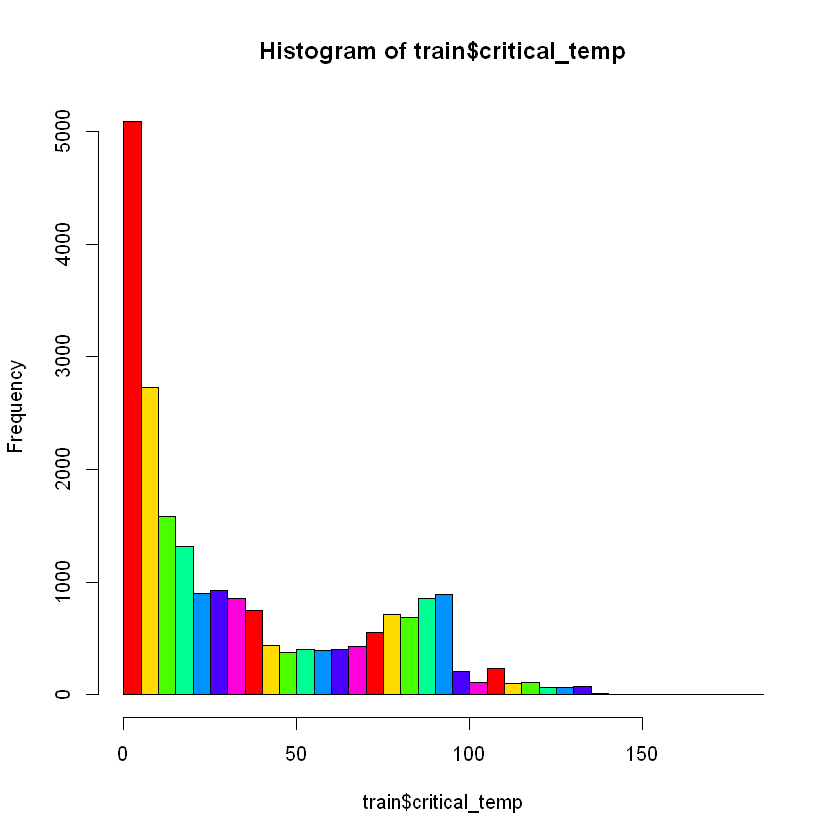

In [36]:
hist(train$critical_temp,col=rainbow(7), breaks=50)

o We can see from the above histogram plot that most superconductors have low critical temperature.<br>
o The distribution of the values are left skewed.<br>
o Few superconductors have high critical temperature.

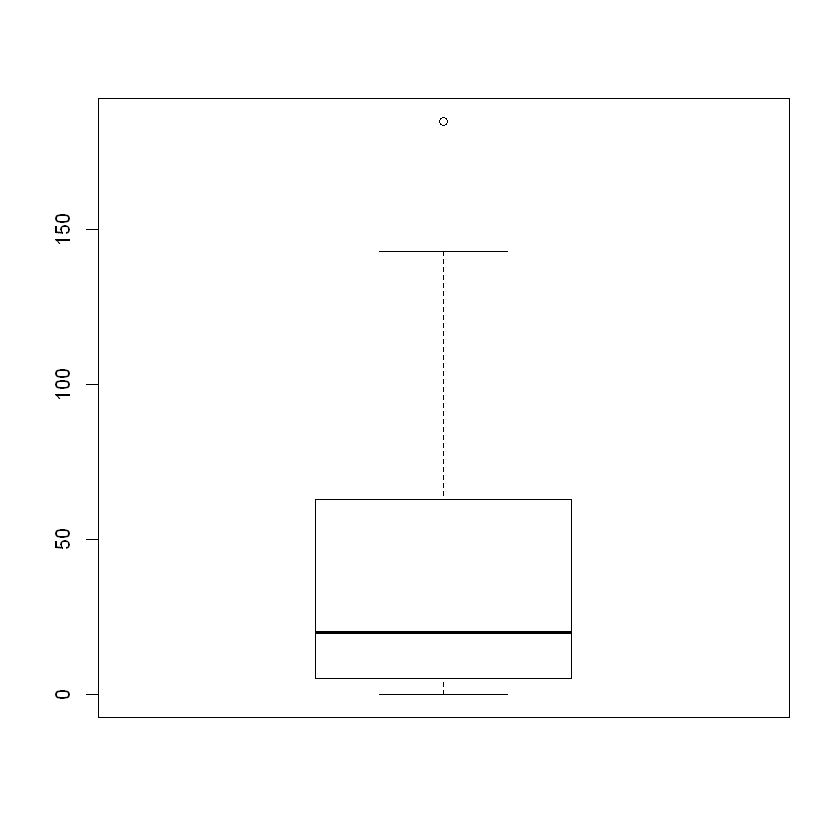

In [37]:
boxplot(train$critical_temp)

The above boxplot shows that there is an outlier in the critical temp column. However, the effect of this one outlier will not be significant on the prediction accuracy. So, for this instance I will choose not to remove the outlier.

During data exploration I also noticed multicollinearity between some of the features.<br>
For a given predictor (p), multicollinearity can assessed by computing a score called the variance inflation factor (or VIF), which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model. <br>

The smallest possible value of VIF is one (absence of multicollinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity (James et al. 2014).<br>

When faced to multicollinearity, the concerned variables should be removed, since the presence of multicollinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables (James et al. 2014,P. Bruce and Bruce (2017)).<br>

We will further run the VIF test to check any problematic features and treat them accordingly during model building stage.

In [38]:
#covariance #multi-colinearity #interaction functioin in r does vector multiplication

## 3. Model Development<a class="anchor" id="sec_3"></a>

For model building, I will first be splitting the data set in to training data set and test data set in the proportion 75% and 25% respectively.<br>
I will first begin with full linear regression model with all features to gain further insights on the prediction.

In [39]:
# Splitting the data into training and testing dataset. Proportion 75% training and 25% testing as per industry standard

In [40]:
# https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function
smp_size <- floor(0.75 * nrow(train))

## set the seed to make the partition reproducible
set.seed(1234)
train_ing <- sample(seq_len(nrow(train)), size = smp_size)

train_tc <- train[train_ing, ] # creating training set for developing model
test_tc <- train[-train_ing, ] # creating testing set for testing the predictions made by model

In [41]:
smp_size

[1] 15947

In [42]:
nrow(train_tc) # printing number of rows of train dataset
nrow(test_tc) # printing number of rows of test dataset

[1] 15947

[1] 5316

In [43]:
head(train_tc)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
2418,5,63.00089,44.59169,54.17727,33.48271,1.5008382,1.4419714,72.90645,12.60480,26.469420,30.999627,796.1200,998.9984,758.1970,938.5950,1.5571739,0.9892775,764.1,664.6176,270.20552,332.87046,155.2,111.9280,137.4822,89.95869,1.5164246,1.4521026,171,31.39200,61.48626,70.9604032,4992.686,2928.263,1060.321,73.84715,1.2811713,1.0024058,8958.571,1934.617,3514.903,3657.014,73.04600,105.09600,46.87174,72.83792,1.3221876,0.7886607,135.97,73.05520,51.50643,52.96719,9.78440,5.525840,5.328768,1.443807,1.3788213,1.2464092,15.978,2.714160,5.466020,5.787386,110.40532,95.77382,14.46193,1.368675,0.8254398,0.4130043,399.9734,86.38618,148.70597,160.76845,2.600000,2.128000,2.491462,2.100593,1.5649573,1.3444189,2,0.9440000,0.8000000,0.3995197,13.00
13232,2,141.08350,118.52175,133.67282,113.25742,0.6410900,0.6699709,90.24700,25.41825,45.123500,39.078097,721.9500,703.3750,720.9935,702.6638,0.6918226,0.5830661,74.3,323.8250,37.15000,32.17284,189.0,189.5000,188.9974,189.49801,0.6931332,0.5601506,2,95.50000,1.00000,0.8660254,15650.000,12965.000,14699.850,12292.86222,0.6330644,0.6751106,10740.000,2455.000,5370.000,4650.556,44.70000,59.05000,34.26952,50.15359,0.4698294,0.2477513,57.40,51.05000,28.70000,24.85493,34.50000,35.250000,34.467376,35.225354,0.6922017,0.5441151,3.000,18.750000,1.500000,1.299038,93.50000,116.25000,81.68231,106.554405,0.5695604,0.3321135,91.0000,92.25000,45.50000,39.40416,6.500000,6.250000,6.480741,6.235739,0.6901857,0.5929533,1,2.7500000,0.5000000,0.4330127,0.01
12954,3,116.86646,132.88682,103.04751,118.62235,0.9883303,0.8212789,130.00638,77.73856,53.090889,53.702301,706.1333,719.6250,704.6968,718.1570,1.0965829,1.0182135,110.0,217.5250,44.93108,45.38917,172.0,179.0000,170.5289,177.46227,1.0900712,0.9906680,55,63.75000,22.46479,22.9237868,10023.333,11680.000,9059.918,10548.64716,0.9949264,0.7976166,10540.000,6797.500,4711.301,4988.076,64.46667,56.47500,56.90058,49.46618,0.9766580,1.0486276,76.30,14.17500,32.35350,31.25159,21.93333,25.450000,17.910669,21.326003,0.9355835,0.7641548,29.000,16.250000,11.855050,11.937651,51.66667,53.00000,49.10252,50.967878,1.0523159,0.9787814,36.0000,20.75000,15.17308,13.34166,4.666667,4.750000,4.641589,4.728708,1.0933747,1.0171644,1,1.5000000,0.4714045,0.4330127,3.70
13254,3,100.74396,95.42373,100.57788,95.32718,1.0969808,0.6101943,13.51362,69.14768,5.724723,4.367117,728.8667,677.9950,726.6206,677.5280,1.0955157,0.6075618,139.9,493.

In [44]:
head(test_tc)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
1,4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,53.62253,775.425,1010.269,718.1529,938.0168,1.305967,0.7914878,810.6,735.9857,323.8118,355.5630,160.25,105.5143,136.1260,84.52842,1.259244,1.207040,205,42.91429,75.23754,69.23557,4654.357,2961.502,724.9532,53.54381,1.0331288,0.8145982,8958.571,1579.583,3306.163,3572.597,81.8375,111.7271,60.12318,99.41468,1.159687,0.7873817,127.05,80.98714,51.43371,42.55840,6.9055,3.846857,3.479475,1.040986,1.088575,0.9949982,12.878,1.744571,4.599064,4.666920,107.7566,61.01519,7.062488,0.6219795,0.3081480,0.2628483,399.9734,57.12767,168.8542,138.5172,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.0857143,0.4330127,0.4370588,29
2,5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,53.97987,766.440,1010.613,720.6055,938.7454,1.544145,0.8070782,810.6,743.1643,290.1830,354.9635,161.20,104.9714,141.4652,84.37017,1.508328,1.204115,205,50.57143,67.32132,68.00882,5821.486,3021.017,1237.0951,54.09572,1.3144422,0.9148022,10488.571,1667.383,3767.403,3632.649,90.8900,112.3164,69.83331,101.16640,1.427997,0.8386665,127.05,81.20786,49.43817,41.66762,7.7844,3.796857,4.403790,1.035251,1.374977,1.0730938,12.878,1.595714,4.473363,4.603000,172.2053,61.37233,16.064228,0.6197346,0.8474042,0.5677061,429.9734,51.41338,198.5546,139.6309,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.1285714,0.6324555,0.4686063,26
3,4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,53.65627,775.425,1010.820,718.1529,939.0090,1.305967,0.7736202,810.6,743.1643,323.8118,354.8042,160.25,104.6857,136.1260,84.21457,1.259244,1.132547,205,49.31429,75.23754,67.79771,4654.357,2999.159,724.9532,53.97402,1.0331288,0.7603052,8958.571,1667.383,3306.163,3592.019,81.8375,112.2136,60.12318,101.08215,1.159687,0.7860067,127.05,81.20786,51.43371,41.63988,6.9055,3.822571,3.479475,1.037439,1.088575,0.9274794,12.878,1.757143,4.599064,4.649635,107.7566,60.94376,7.062488,0.6190947,0.3081480,0.2504774,399.9734,57.12767,168.8542,138.5406,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.1142857,0.4330127,0.4446966,19
4,4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,53.63940,775.425,1010.544,718.1529,938.5128,1.305967,0.7832067,810.6,739.5750,323.8118,355.1839,160.25,105.1000,136.1260,84.37135,1.259244,1.173033,205,46.11429,75.23754,68.52166,46

## 3.1 - Full model - Multiple Linear Regression model with all features

I wish to create a multiple linear regression model considering all the features.<br>
This will me serve me with two purposes. 1) It will provide me further analysis on the significane of
the features. 2) This model will also set the benchmark on the accuracy of predictions on test data. <br>
So, any changes to this model should provide better prediction accuracy.

In [45]:
# Creating a multiple linear regression model including all features

In [46]:
model <- lm(train_tc$critical_temp ~ ., data = train_tc)

In [47]:
summary(model)


Call:
lm(formula = train_tc$critical_temp ~ ., data = train_tc)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.898  -9.420   0.626  10.933 115.646 

Coefficients:
                                      Estimate     Std. Error t value
(Intercept)                      -21.220123330    5.706253102  -3.719
number_of_elements                -3.944495885    0.855232480  -4.612
mean_atomic_mass                   0.856854421    0.094646307   9.053
wtd_mean_atomic_mass              -0.919166740    0.118483231  -7.758
gmean_atomic_mass                 -0.521583979    0.093989987  -5.549
wtd_gmean_atomic_mass              0.667174308    0.112576418   5.926
entropy_atomic_mass              -37.269473026    5.237156789  -7.116
wtd_entropy_atomic_mass            6.787401163    4.163962863   1.630
range_atomic_mass                  0.208841787    0.019006258  10.988
wtd_range_atomic_mass              0.032106170    0.025204971   1.274
std_atomic_mass                   -0.562620041    0.0721

o The full model has proveided 0.73 adjusted R2, which is not terrible but we now know that we now have to try to build a better model than this.
<br>
o The summary of the model also shows the significane of each variable in terms of prediction by providing p-values of the variables.<br>
o We will now extract the features whose p-value is less than 0.05 to build the next model with selected features.<br>
o We will also extract the information about the problomatic multicollinear with VIF function of the car package and make further decisions about manipulating them.

Making predictions using the full model on the test data to check accuracy with the help of MSE.

In [48]:
predmod = predict(model, newdata = test_tc, type="response")

In [49]:
regr.eval(predmod, test_tc$critical_temp)

mae        mse       rmse       mape 
 13.459615 315.072358  17.750278   1.224934

In [50]:
R2(predmod, test_tc$critical_temp)

[1] 0.7339458

Checking for the problomatic multicollinear variables in the model. As per above, we know that features with values 5 or 10 are considered problomatic. We can either combine the multicollinear variables or remove them from the next model to reduce the inflation of the model. <br>

But, from below all 81 variables seem to have inflated the model above normal rate. So, removing them all will not make sense.
At this stage, I wish to try other models such as stepwise regression to see if multicollinearity is having considerable effect on the prediction. If not then I am in fair of having a complex model with more features if it provides better accuracy.

In [51]:
car::vif(model)

number_of_elements                mean_atomic_mass 
                       79.12487                       412.81329 
           wtd_mean_atomic_mass               gmean_atomic_mass 
                      823.88945                       443.83876 
          wtd_gmean_atomic_mass             entropy_atomic_mass 
                      888.46042                       190.99786 
        wtd_entropy_atomic_mass               range_atomic_mass 
                      145.87972                        56.10658 
          wtd_range_atomic_mass                 std_atomic_mass 
                       24.12694                       109.09924 
            wtd_std_atomic_mass                        mean_fie 
                       82.62865                      2102.02859 
                   wtd_mean_fie                       gmean_fie 
                     8284.39315                      1642.86920 
                  wtd_gmean_fie                     entropy_fie 
                     5646.26686                      4080.87530 
                wtd_entropy_fie                       range_fie 
                      176.75088                       268.00224 
                  wtd_range_fie                         std_fie 
                       45.04959                       413.48824 
                    wtd_std_fie              mean_atomic_radius 
                      472.83407                       892.98363 
         wtd_mean_atomic_radius             gmean_atomic_radius 
                     3278.66808                      1073.58960 
        wtd_gmean_atomic_radius           entropy_atomic_radius 
                     4859.40431                      2995.22130 
      wtd_entropy_atomic_radius             range_atomic_radius 
                      317.76961                       152.55760 
        wtd_range_atomic_radius               std_atomic_radius 
                       21.82484                       343.64963 
          wtd_std_atomic_radius                    mean_Density 
                      333.13724                       138.63633 
               wtd_mean_Density                   gmean_Density 
                      267.38035                       206.30066 
              wtd_gmean_Density                 entropy_Density 
                      367.94933                        99.25973 
            wtd_entropy_Density                   range_Density 
                       50.61991                        54.29554 
              wtd_range_Density                     std_Density 
                       26.93490                        93.71440 
                wtd_std_Density           mean_ElectronAffinity 
                       46.98629                       111.99055 
      wtd_mean_ElectronAffinity          gmean_ElectronAffinity 
                      180.02449                        91.47441 
     wtd_gmean_ElectronAffinity        entropy_ElectronAffinity 
                      135.22603                        54.09258 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                       26.96153                        71.97671 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                       24.10140                       110.64840 
       wtd_std_ElectronAffinity                 mean_FusionHeat 
                       42.76887                       314.05121 
            wtd_mean_FusionHeat                gmean_FusionHeat 
                      528.97797                       213.96022 
           wtd_gmean_FusionHeat              entropy_FusionHeat 
                      391.06226                        72.16426 
         wtd_entropy_FusionHeat                range_FusionHeat 
                       34.89612                       128.74761 
           wtd_range_FusionHeat                  std_FusionHeat 
                       42.06853                       362.91543 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                       91.03489                 

In [52]:
length(car::vif(model))

[1] 81

Next, we will build a multiple linear model with selected features based on p-values.

In [53]:
summary(model)$coefficient # printing p-values of the features

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-21.220123330308,5.7062531024,-3.718749055,0.0002009012801757742298133097014201098318153526633977890014648437500000000000
number_of_elements,-3.944495885345,0.8552324801,-4.612191395,0.0000040155899933919642331124622014471015063463710248470306396484375000000000
mean_atomic_mass,0.856854421003,0.0946463066,9.053226184,0.0000000000000000001546442367408308609256356591643566389393527060747146606445
wtd_mean_atomic_mass,-0.919166739793,0.1184832306,-7.757779184,0.0000000000000091664890334990238585088917488974402658641338348388671875000000
gmean_atomic_mass,-0.521583978831,0.0939899875,-5.549356829,0.0000000291312503328043485590487238212631382339168339967727661132812500000000
wtd_gmean_atomic_mass,0.667174307735,0.1125764185,5.926412625,0.0000000031603773912473539886396067810636623107711784541606903076171875000000
entropy_atomic_mass,-37.269473025546,5.2371567893,-7.116356169,0.0000000000011556053899818816394591200480412851447908906266093254089355468750
wtd_entropy_atomic_mass,6.787401162735,4.1639628628,1.630034029,0.1031141568030302796410424548412265721708536148071289062500000000000000000000
range_atomic_mass,0.208841786754,0.0190062580,10.988053859,0.0000000000000000000000000005503201453308669562070054581681688432581722736359
wtd_range_atomic_mass,0.032106170267,0.0252049711,1.273803096,0.2027518682713220499191919543591211549937725067138671875000000000000000000000


In [54]:
summary(model)$coefficient[-1,4] # only printing p-values of all the features and excluding the intercept

number_of_elements 
0.0000040155899933919464452579395352671554064727388322353363037109375000000000 
                                                              mean_atomic_mass 
0.0000000000000000001546442367408308609256356591643566389393527060747146606445 
                                                          wtd_mean_atomic_mass 
0.0000000000000091664890334990238585088917488974402658641338348388671875000000 
                                                             gmean_atomic_mass 
0.0000000291312503328043485590487238212631382339168339967727661132812500000000 
                                                         wtd_gmean_atomic_mass 
0.0000000031603773912473539886396067810636623107711784541606903076171875000000 
                                                           entropy_atomic_mass 
0.0000000000011556053899818816394591200480412851447908906266093254089355468750 
                                                       wtd_entropy_atomic_mass 
0.1031141568030302796410424548412265721708536148071289062500000000000000000000 
                                                             range_atomic_mass 
0.0000000000000000000000000005503201453308669562070054581681688432581722736359 
                                                         wtd_range_atomic_mass 
0.2027518682713220499191919543591211549937725067138671875000000000000000000000 
                                                               std_atomic_mass 
0.0000000000000068004533788145949649468768871685142585192807018756866455078125 
                                                           wtd_std_atomic_mass 
0.0808806557635720069221463290887186303734779357910156250000000000000000000000 
                                                                      mean_fie 
0.0153600257094614906644425289528044231701642274856567382812500000000000000000 
                                                                  wtd_mean_fie 
0.0814734612889738696317465382890077307820320129394531250000000000000000000000 
                                                                     gmean_fie 
0.0185220256494105228739499580115079879760742187500000000000000000000000000000 
                                                                 wtd_gmean_fie 
0.0467677118405207190021677376989828189834952354431152343750000000000000000000 
                                                                   entropy_fie 
0.0000002436706891428555166222505445894341846724273636937141418457031250000000 
                                                               wtd_entropy_fie 
0.0000000000000127451545872221470151724326269615517048805486410856246948242187 
                                                                     range_fie 
0.0000000000000000000000052258111351575070244179777034787548473104834556579590 
                                                                 wtd_range_fie 
0.0000004688834996410572331093646880617598071694374084472656250000000000000000 
                                                                       std_fie 
0.0000000000000000498126103207907131118631349764314109052065759897232055664062 
                                                                   wtd_std_fie 
0.2845896427091605396242357528535649180412292480468750000000000000000000000000 
                                                            mean_atomic_radius 
0.0120635269258512062284793842081853654235601425170898437500000000000000000000 
                                                        wtd_mean_atomic_radius 
0.0000000000000000000000000000075019733904542322119532449242740312911337241530 
                                                           gmean_atomic_radius 
0.3764204637711328071958405416808091104030609130859375000000000000000000000000 
                                                       wtd_gmean_atomic_radius 
0.0000000000000000000000034675865012730654260431073510062560671940445899963379 
                                                         ent

In [55]:
sum_mod = summary(model) # saving the summary of the model in a separate variable for later access

In [56]:
feat_list = list() # creating empty list to store good features

In [57]:
# running a loop through p-values of all features in the model and saving significant features in a list variable.

for (p in attr(coef(sum_mod),"dimnames")[[1]]){
    #print(p)
    pval = coef(sum_mod)[p, 4]
    #print(pval)
    if (pval < 0.05){
        feat_list = append(feat_list, p)
    }
}

In [123]:
head(feat_list, 10)

[[1]]
[1] "number_of_elements"

[[2]]
[1] "mean_atomic_mass"

[[3]]
[1] "wtd_mean_atomic_mass"

[[4]]
[1] "gmean_atomic_mass"

[[5]]
[1] "wtd_gmean_atomic_mass"

[[6]]
[1] "entropy_atomic_mass"

[[7]]
[1] "range_atomic_mass"

[[8]]
[1] "std_atomic_mass"

[[9]]
[1] "mean_fie"

[[10]]
[1] "gmean_fie"

In [59]:
feat_list = feat_list[-1] # removing intercept from the list

## 3.2 - MODEL 1: Multiple linear regression with selected features

In [125]:
head(feat_list, 10) # list of features to be included in the next model development

[[1]]
[1] "number_of_elements"

[[2]]
[1] "mean_atomic_mass"

[[3]]
[1] "wtd_mean_atomic_mass"

[[4]]
[1] "gmean_atomic_mass"

[[5]]
[1] "wtd_gmean_atomic_mass"

[[6]]
[1] "entropy_atomic_mass"

[[7]]
[1] "range_atomic_mass"

[[8]]
[1] "std_atomic_mass"

[[9]]
[1] "mean_fie"

[[10]]
[1] "gmean_fie"

In [61]:
# Multiple linear regression model with significant selected features

In [62]:
model1 = lm(paste("train_tc$critical_temp ~", paste(feat_list, collapse ="+")), data=train_tc)

In [63]:
summary(model1)


Call:
lm(formula = paste("train_tc$critical_temp ~", paste(feat_list, 
    collapse = "+")), data = train_tc)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.062  -9.427   0.570  10.964 115.138 

Coefficients:
                                 Estimate  Std. Error t value
(Intercept)                   -20.5620041   5.5598735  -3.698
number_of_elements             -4.4560768   0.8296552  -5.371
mean_atomic_mass                0.8431720   0.0684693  12.315
wtd_mean_atomic_mass           -0.8178440   0.0596878 -13.702
gmean_atomic_mass              -0.5142891   0.0728593  -7.059
wtd_gmean_atomic_mass           0.5879268   0.0640308   9.182
entropy_atomic_mass           -30.4542368   4.6787013  -6.509
range_atomic_mass               0.2125492   0.0188265  11.290
std_atomic_mass                -0.4864153   0.0505120  -9.630
mean_fie                        0.1396452   0.0481326   2.901
gmean_fie                      -0.1383552   0.0474439  -2.916
wtd_gmean_fie                   0.02

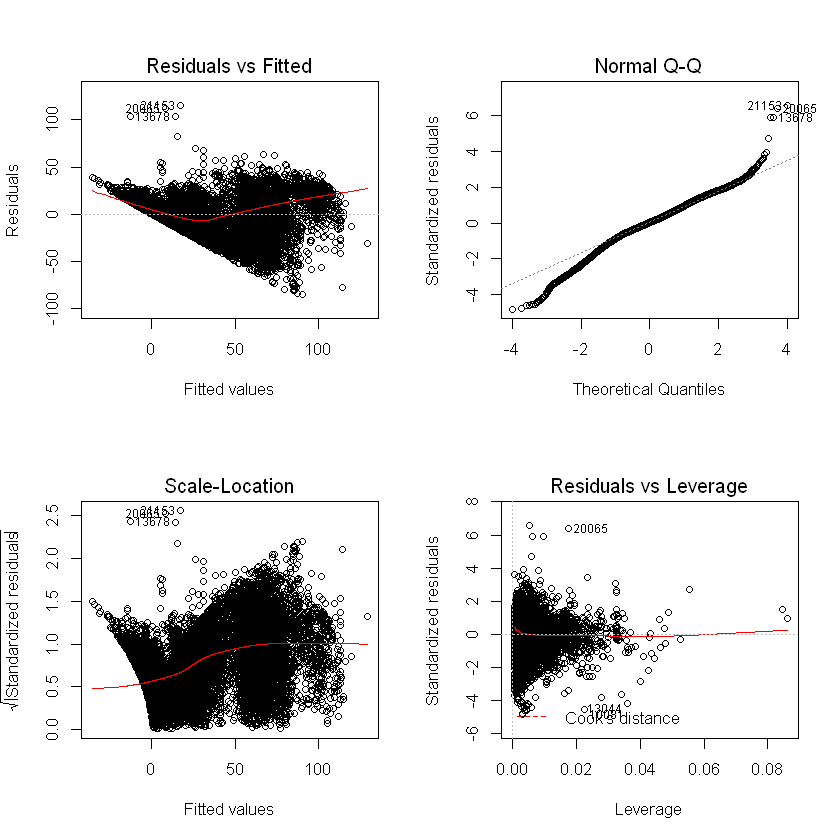

In [64]:
par(mfrow = c(2, 2))
plot(model1)

In [65]:
# prediction on test dataset using above model with selected features

In [66]:
predmod1 = predict(model1, newdata = test_tc, type="response")

In [67]:
length(predmod1)

[1] 5316

In [68]:
nrow(test_tc)

[1] 5316

In [69]:
summary(predmod1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-33.030   9.168  27.100  34.764  63.469 131.919 

In [70]:
# creating a dataframe of actuals vs predicted from test data for further analysis

act_preds = data.frame(cbind(actuals = test_tc$critical_temp, predicted = predmod1, difference = (test_tc$critical_temp - predmod1)))
head(act_preds, 20)

,actuals,predicted,difference
1,29.0,32.12662,-3.126621
2,26.0,39.95932,-13.959319
3,19.0,27.96811,-8.968106
4,22.0,30.17088,-8.170883
7,11.0,47.77596,-36.775960
10,31.0,27.34035,3.659650
12,26.0,43.09659,-17.096589
16,27.0,50.20258,-23.202585
19,39.0,25.08538,13.914624
22,35.5,28.39642,7.103580


In [71]:
AIC(model1) # printing AIC values for model

[1] 136725.2

In [72]:
corr_accuracy = cor(act_preds)

In [73]:
corr_accuracy

,actuals,predicted,difference
actuals,1.0000000,0.856269526,0.524036638
predicted,0.8562695,1.000000000,0.008790825
difference,0.5240366,0.008790825,1.000000000


In [74]:
# Model performance
# (a) Compute the prediction error, RMSE
RMSE(predmod1, test_tc$critical_temp)

[1] 17.77539

In [75]:
# (b) Compute R-square
R2(predmod1, test_tc$critical_temp)

[1] 0.7331975

In [76]:
regr.eval(predmod1, test_tc$critical_temp)

mae         mse        rmse        mape 
 13.4811343 315.9645680  17.7753922   0.9970541

Multiple linear regression model with selected features did not seem to have produced better accuracy.<br>
So, next we will try stepwise regression hybrid direction which is both forward and backward.

## 3.3 - Model2: Hybrid stepwise regression (forward and bacward direction)

In [77]:
model2 = step(model, direction="both")

Start:  AIC=91452.96
train_tc$critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + wtd_entropy_atomic_mass + range_atomic_mass + 
    wtd_range_atomic_mass + std_atomic_mass + wtd_std_atomic_mass + 
    mean_fie + wtd_mean_fie + gmean_fie + wtd_gmean_fie + entropy_fie + 
    wtd_entropy_fie + range_fie + wtd_range_fie + std_fie + wtd_std_fie + 
    mean_atomic_radius + wtd_mean_atomic_radius + gmean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + wtd_mean_Density + 
    gmean_Density + wtd_gmean_Density + entropy_Density + wtd_entropy_Density + 
    range_Density + wtd_range_Density + std_Density + wtd_std_Density + 
    mean_ElectronAffinity + wtd_mean_ElectronAffinity + gmean_ElectronAffinity + 
    wtd_gmean_ElectronA

In [78]:
summary(model2)


Call:
lm(formula = train_tc$critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_std_atomic_mass + mean_fie + wtd_mean_fie + gmean_fie + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_range_ElectronAffinity + std_ElectronAffinity + 
    wtd_std_

In [79]:
length(model2$coefficients)

[1] 72

In [80]:
predmod2 = predict(model2, newdata = test_tc, type="response")

summary(predmod2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-30.442   9.453  26.462  34.763  63.585 130.488 

In [81]:
AIC(model2) # printing AIC values for model

[1] 136700

In [126]:
# creating a dataframe of actuals vs predicted from test data for further analysis

act_preds2 = data.frame(cbind(actuals = test_tc$critical_temp, predicted = predmod2, difference = (test_tc$critical_temp - predmod2)))
head(act_preds2, 10)

,actuals,predicted,difference
1,29.0,30.87960,-1.879602
2,26.0,38.56248,-12.562481
3,19.0,26.41763,-7.417634
4,22.0,28.77989,-6.779895
7,11.0,47.97196,-36.971960
10,31.0,26.86099,4.139008
12,26.0,42.54642,-16.546417
16,27.0,48.72724,-21.727240
19,39.0,24.50537,14.494632
22,35.5,27.96317,7.536831


In [83]:
corr_accuracy2 = cor(act_preds2)
corr_accuracy2

,actuals,predicted,difference
actuals,1.0000000,0.856701133,0.522156632
predicted,0.8567011,1.000000000,0.007421166
difference,0.5221566,0.007421166,1.000000000


In [84]:
# Model 2 performance
# (a) Compute the prediction error, RMSE
RMSE(predmod2, test_tc$critical_temp)

# (b) Compute R-square
R2(predmod2, test_tc$critical_temp)

[1] 17.75055

[1] 0.7339368

In [85]:
regr.eval(predmod2, test_tc$critical_temp)

mae        mse       rmse       mape 
 13.470251 315.082099  17.750552   2.621583

We again see not much of an improvement in the accuracy of this model compared to both the previous models.<br>
So, next we will try K-fold cross validation where k = 10.

## 3.4: K-fold cross-validation (k=10)

In [86]:
# Define training control
set.seed(1234) 
train.control <- trainControl(method = "cv", number = 10, savePredictions = TRUE)
# Train the model
kmodel <- train(critical_temp ~., data = train, method = "lm",
               trControl = train.control)
# Summarize the results
print(kmodel)

Linear Regression 

21263 samples
   81 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19138, 19137, 19136, 19137, 19137, 19135, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  17.61812  0.7354753  13.34115

Tuning parameter 'intercept' was held constant at a value of TRUE


In [87]:
summary(kmodel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.987  -9.370   0.595  10.976 171.246 

Coefficients:
                                     Estimate    Std. Error t value
(Intercept)                      -20.80657480    4.99066050  -4.169
number_of_elements                -3.49645392    0.74804502  -4.674
mean_atomic_mass                   0.84804166    0.08274328  10.249
wtd_mean_atomic_mass              -0.90406994    0.10305149  -8.773
gmean_atomic_mass                 -0.51019886    0.08194175  -6.226
wtd_gmean_atomic_mass              0.64680830    0.09763832   6.625
entropy_atomic_mass              -35.96059427    4.59917118  -7.819
wtd_entropy_atomic_mass            4.55452159    3.63806635   1.252
range_atomic_mass                  0.21418041    0.01652972  12.957
wtd_range_atomic_mass              0.02598372    0.02207596   1.177
std_atomic_mass                   -0.56080214    0.06275627  -8.936
wtd_std_atomic_mass          

In [88]:
#predictions on k fold cv

In [130]:
head(kmodel$pred)
tail(kmodel$pred)

pred,obs,rowIndex,intercept,Resample
35.73732,27,13,TRUE,Fold01
37.87570,27,14,TRUE,Fold01
43.04168,26,15,TRUE,Fold01
24.37893,39,19,TRUE,Fold01
23.62459,20,28,TRUE,Fold01
76.98864,90,33,TRUE,Fold01


,pred,obs,rowIndex,intercept,Resample
21258,-4.363863,2.00,21185,TRUE,Fold10
21259,13.989209,10.00,21195,TRUE,Fold10
21260,14.276037,15.00,21196,TRUE,Fold10
21261,15.290049,22.60,21228,TRUE,Fold10
21262,6.357704,2.44,21259,TRUE,Fold10
21263,-4.990084,1.98,21261,TRUE,Fold10


We can again see that we did not get lot of success from this model either. The adjusted R2 remains similar.<br>
As per the recommendation of Dr Grayming, I will now try to build an XGBoost model to get better accuracy.

## 3.5: XGBoost regression model with cross validation

In [90]:
# response feature for train and test
y = train_tc$critical_temp
z = test_tc$critical_temp

In [91]:
# transforming the train and test dataset created earlier into matrix to input into xgb model

In [92]:
dtrain <- xgb.DMatrix(data=as.matrix(train_tc),label=y)

In [93]:
dtest <- xgb.DMatrix(data=as.matrix(test_tc), label=z)

In [94]:
# setting the parameters for the model

In [95]:
param <- list(booster = "gblinear"
              , objective = "reg:linear"
              , subsample = 0.7
              , max_depth = 5
              , colsample_bytree = 0.7
              , eta = 0.037
              , eval_metric = 'rmse'
              , base_score = 0.012 #average
              , min_child_weight = 100)

In [96]:
# Perform xgboost cross-validation to find the best parameters for final model

xgb_cv <- xgb.cv(data=dtrain,
                 params=param,
                nrounds=100,
                prediction=TRUE,
                maximize=FALSE,
                folds=createFolds(y, k=7, list=TRUE, returnTrain=FALSE),
                early_stopping_rounds = 30,
                print_every_n = 5
)

[1]	train-rmse:29.873377+0.200186	test-rmse:29.873640+0.202175 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[6]	train-rmse:22.419794+0.081514	test-rmse:22.420569+0.164224 
[11]	train-rmse:20.314802+0.049688	test-rmse:20.316640+0.169936 
[16]	train-rmse:18.945821+0.034509	test-rmse:18.949016+0.181844 
[21]	train-rmse:17.841468+0.028802	test-rmse:17.845796+0.189083 
[26]	train-rmse:16.905043+0.027038	test-rmse:16.910472+0.195470 
[31]	train-rmse:16.088775+0.026123	test-rmse:16.094450+0.198777 
[36]	train-rmse:15.361074+0.024960	test-rmse:15.367631+0.200834 
[41]	train-rmse:14.700749+0.023464	test-rmse:14.707467+0.200513 
[46]	train-rmse:14.093613+0.022023	test-rmse:14.101174+0.199261 
[51]	train-rmse:13.529749+0.020457	test-rmse:13.538129+0.196638 
[56]	train-rmse:13.002989+0.018939	test-rmse:13.011360+0.194705 
[61]	train-rmse:12.506966+0.017706	test-rmse:12.515548+0.191586 
[66]	train-rmse:12.038303

In [97]:
# to check best results and get best nrounds
print(xgb_cv$evaluation_log[which.min(xgb_cv$evaluation_log$test_rmse_mean)])
nrounds <- xgb_cv$best_iteration

   iter train_rmse_mean train_rmse_std test_rmse_mean test_rmse_std
1:  100        9.413949     0.01464562       9.423216      0.163891


## 3.6: Final Model - XGBoost model

The model returned lowest error at the 100th (nround) iteration.

In [98]:
# Final model
################
xgb <- xgb.train(params = param
                 , data = dtrain
                 , nrounds = nrounds
                 , verbose = 1
                 , print_every_n = 5
                )

In [99]:
# Predict
preds <- predict(xgb,dtest)

In [100]:
summary(preds)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-18.054   7.956  28.062  34.977  63.293 114.778 

In [101]:
head(data.frame(cbind(test_tc$critical_temp, preds)), 20)

V1,preds
29.0,37.37890
26.0,36.25397
19.0,31.30883
22.0,33.26510
11.0,30.57784
31.0,38.12121
26.0,38.42154
27.0,36.80226
39.0,42.16992
35.5,40.72068


In [102]:
length(preds)

[1] 5316

In [103]:
cat("RMSE for XGBoost model is:",RMSE(preds, test_tc$critical_temp))

RMSE for XGBoost model is: 9.507683

In [104]:
cat("R2 for XGBoost model on test is:",R2(preds, test_tc$critical_temp))

R2 for XGBoost model on test is: 0.9328138

In [105]:
xgb_mse = RMSE(preds, test_tc$critical_temp)^2
cat("MSE for XGBoost model on the test data is:",xgb_mse)

MSE for XGBoost model on the test data is: 90.39604

This model has generated much improved adjusted R2 of 0.94. We can now be much more confident about the accuracy compared to previous models.<br>
In the next section we will perform model comparision by using avona test as well as compare the MSE of each model.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In [106]:
# anova test for model comparision

1. Comparing full model with MLR with selected features.

In [107]:
anova(model, model1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
15865,4884358,NA,NA,NA,NA
15877,4896209,-12,-11851.08,3.207816,0.0001291397


The result shows that model 2 did indeed provide a significantly better fit to the data compared to model 1. However, as we know from our previous analysis, model 2 is not significantly better than model 1.

2. Comparing MLR with selected features with stepwise regression model.

In [108]:
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
15877,4896209,NA,NA,NA,NA
15875,4887238,2,8971.21,14.57039,0.0000004763861


In this instance, the stepwise regressions seems to be the better model.

We will now compare the Mean Squared Error (MSE) generated by each model on the test data after prediction.

In [109]:
mse_fmod = mse(test_tc$critical_temp, predmod)

In [110]:
mse_mod1 = mse(test_tc$critical_temp, predmod1)

In [111]:
mse_mod2 = mse(test_tc$critical_temp, predmod2)

In [112]:
kmod_mse = (kmodel$results$RMSE)^2
kmod_mse

[1] 310.3981

In [113]:
xgb_mse

[1] 90.39604

Creating a table to store MSE and RMSE of all the models for comparision.

In [114]:
comp_mse <- matrix(c(mse_fmod, mse_mod1, mse_mod2, kmod_mse, xgb_mse, sqrt(mse_fmod)
                     , sqrt(mse_mod1), sqrt(mse_mod2), sqrt(kmod_mse), sqrt(xgb_mse))
                   ,ncol=5, byrow=T)
colnames(comp_mse) = c("Full Model","MLR with selected","Stepwise","K-fold","XGBoost")
rownames(comp_mse) = c("MSE", "RMSE")
comp_mse = as.table(comp_mse)

In [115]:
comp_mse

     Full Model MLR with selected   Stepwise     K-fold    XGBoost
MSE  315.072358        315.964568 315.082099 310.398091  90.396045
RMSE  17.750278         17.775392  17.750552  17.618118   9.507683

In [116]:
#xgboost wins!

We can clearly see that the XGBoost model has generated the best MSE out of all the models built. Hence, we are going to select this model.<br>
There are many advantages to choose this model over the other models that we built. This model not only generated the best adjusted R2 but also produced best MSE as well.<br>
The above stated criteria are the best to consider to select the best model. This model is also computationally faster than the stepwise regression model.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

Now that we have finalised the selection of our model. We will now see what features are contributing the most towards the prediction of critical temperature. 

In [117]:
features = names(dtrain)

In [118]:
# Results
###############

# Feature Importance
importance_matrix <- xgb.importance(features,model=xgb)

In [119]:
length(importance_matrix$Feature)

[1] 82

In [120]:
head(importance_matrix,10)

Feature,Weight
wtd_std_Valence,-3.872260
entropy_ThermalConductivity,1.641140
wtd_entropy_ThermalConductivity,1.571160
std_Valence,-1.322070
wtd_entropy_ElectronAffinity,-1.266140
wtd_entropy_atomic_radius,1.171560
wtd_entropy_atomic_mass,1.068730
wtd_entropy_FusionHeat,0.815183
wtd_entropy_Valence,0.684654
entropy_atomic_radius,0.665118


From the above matrix we can see the top 10 contributing features towards the prediction of critical temperature. These variables have more to do with the critical temp. of the super conductor than any other variables.

According to the importance matrix, we will plot the importance of top 20 contributing and important features.

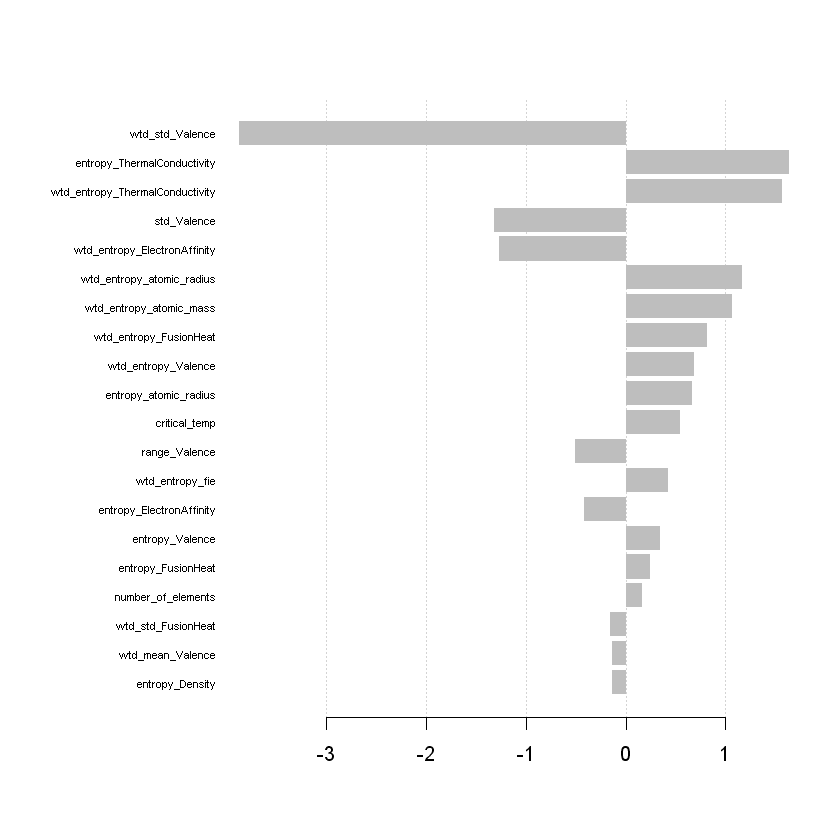

In [121]:
xgb.plot.importance(importance_matrix[1:20]) 

From the above graph, we can clearly see that the XGBoost model has recognised wtd_std_Valence as the most important factor in predicting the critical temperature of a superconductor.<br>
Features extracted from Valence, thermal conductivity, fusion heat and atomic mass appear to be most important features as it appears most often on the list.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

We initially started with a full model of multiple linear regression with all features and acquired the base accuracy. We further built more models but the accuracy did not improve by a lot.<br>
Out of all 5 models we built, we can conclude that XGBoost provided best performance out of all the built models as it provided the best adjusted R2 on training data set and then provided best MSE on the test data set. <br>
From the above graph, we can also conclude that the most contributing features such as features extracted from valence, thermal conductivity, fusion heat and atomic mass could be more important than other properties for the prediction.<br>
We have seen some of the above mentioned variables during the EDA showing high correlation with the predictee. 

## 7. References <a class="anchor" id="sec_7"></a>

o James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014. An Introduction to Statistical Learning: With Applications in R. Springer Publishing Company, Incorporated.

o http://ncss-tech.github.io/stats_for_soil_survey/chapters/4_exploratory_analysis/4_exploratory_analysis.html

o http://www.dmstat1.com/res/TheCorrelationCoefficientDefined.html

o https://stackoverflow.com/questions/7074246/show-correlations-as-an-ordered-list-not-as-a-large-matrix

o https://rstudio-pubs-static.s3.amazonaws.com/240657_5157ff98e8204c358b2118fa69162e18.html

o http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/

o http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/

o https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/

o https://xgboost.readthedocs.io/en/latest/R-package/xgboostPresentation.html